<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Fraud-Detection-Project/blob/main/DAY_9_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DAY 9 – Model Evaluation & Hyperparameter Tuning**

Now that we trained models on Day 8, we’ll:

We will load the best performing model i.e. Random Forest

Afterwards we'll evaluate it using advanced metrics like Confusion Matrix, R² Score, RMSE, MAE (for regression).

Perform Hyperparameter Tuning using GridSearchCV to improve performance.

Finally save the optimized model for final insights (Day 10).

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

Will load the required datasets

In [4]:
from google.colab import files
uploaded = files.upload()
train_df = pd.read_csv("upi_train_prepared.csv")
test_df = pd.read_csv("upi_test_prepared.csv")

X_train = train_df[["Banks_Live_Scaled"]]
y_train = train_df["Volume_Mn"]
X_test = test_df[["Banks_Live_Scaled"]]
y_test = test_df["Volume_Mn"]

train_df.head()

Saving upi_test_prepared.csv to upi_test_prepared (1).csv
Saving upi_train_prepared.csv to upi_train_prepared (1).csv


,Banks_Live_Scaled,Volume_Mn
0,-0.711086,524.94
1,-0.013329,4186.48
2,1.903115,18395.01
3,1.836206,18301.51
4,-0.911811,171.40


Train Base Random Forest Model

In [5]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Base Random Forest Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Base Random Forest Performance:
MAE: 263.25
RMSE: 389.04
R² Score: 0.9953


Visualize Predicted vs Actual Values

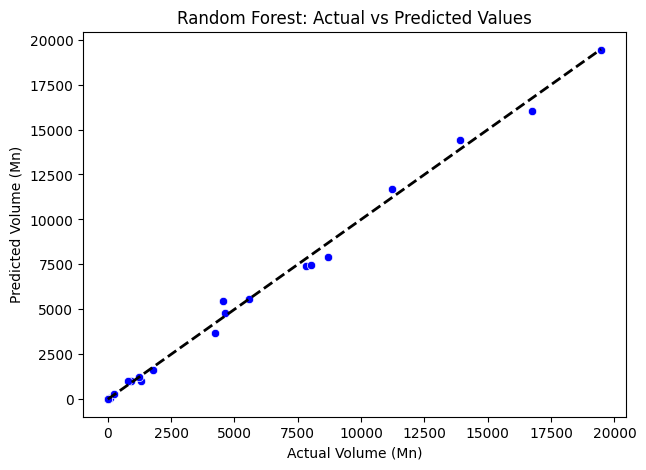

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Volume (Mn)")
plt.ylabel("Predicted Volume (Mn)")
plt.title("Random Forest: Actual vs Predicted Values")
plt.show()

Hyperparameter Tuning with GridSearchCV

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

Best Parameters & Best Model

In [8]:
print("Best Parameters Found:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters Found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Evaluate Tuned Model

In [9]:
y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Tuned Random Forest Performance:")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R² Score: {r2_best:.4f}")

Tuned Random Forest Performance:
MAE: 266.90
RMSE: 396.59
R² Score: 0.9951


Comparing Base and Tuned model

In [10]:
comparison = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Before Tuning": [mae, rmse, r2],
    "After Tuning": [mae_best, rmse_best, r2_best]
})
comparison


,Metric,Before Tuning,After Tuning
0,MAE,263.247425,266.903682
1,RMSE,389.043969,396.591033
2,R² Score,0.995298,0.995114


Saving best model

In [11]:
import joblib

joblib.dump(best_model, "best_random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [12]:
loaded_model = joblib.load("best_random_forest_model.pkl")

In [14]:
import pandas as pd

test_df = pd.read_csv("upi_test_prepared.csv")

X_test_scaled = test_df[["Banks_Live_Scaled"]].values
y_test = test_df["Volume_Mn"].values


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


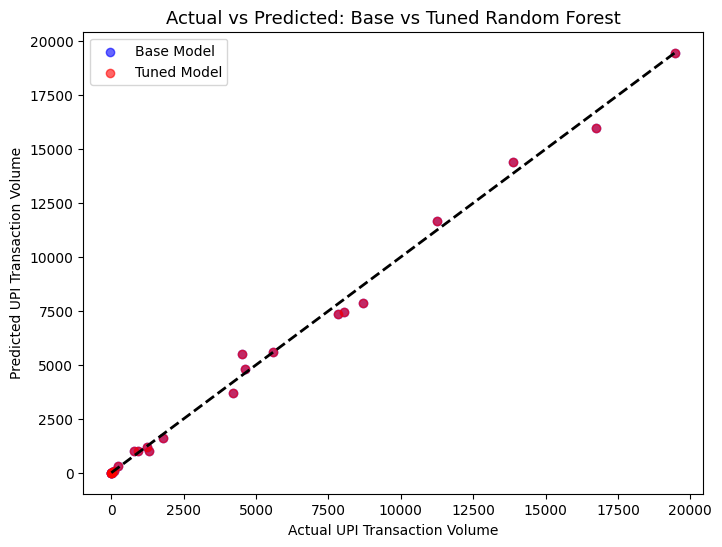

In [15]:
import matplotlib.pyplot as plt

y_pred_base = best_model.predict(X_test_scaled)
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_base, color='blue', alpha=0.6, label='Base Model')
plt.scatter(y_test, y_pred_tuned, color='red', alpha=0.6, label='Tuned Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Actual vs Predicted: Base vs Tuned Random Forest", fontsize=13)
plt.xlabel("Actual UPI Transaction Volume")
plt.ylabel("Predicted UPI Transaction Volume")
plt.legend()
plt.show()
